In [5]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import math, cmath
import naca

In [ ]:
def read(name):
    points = [[],[]]
    with open(name, 'r') as file:
        for line in file:
            strs = line.split(' ')
            points[0].append(float(strs[0]))
            points[1].append(float(strs[-1]))
            
    return np.array(points)

def lerp(x_0, y_0, x_1, y_1, x):
    first_bit = y_0 * (x_1 - x)
    second_bit = y_1 * (x-x_0)

    return (first_bit + second_bit) / (x_1 - x_0)

def camber_line(points):
    half_len = int((len(points[1])-1)/2)

    upper_y = points[1][:half_len]
    upper_x = points[0][:half_len]

    lower_y = points[1][half_len:]
    lower_x = points[0][half_len:]

    
    curve = [[],[]]

    for j in range(len(upper_x)):
        i = 0 
        while lower_x[i] < upper_x[j]:
            i+=1

        y_l = lerp(lower_x[i-1], lower_y[i-1], lower_x[i], lower_y[i], upper_x[j])

        curve[0].append(upper_x[j])
        curve[1].append((y_l +upper_y[j])/2)

    return curve

def thickness(points):
    half_len = int((len(points[1])-1)/2)

    upper_y = points[1][:half_len]
    upper_x = points[0][:half_len]

    lower_y = points[1][half_len:]
    lower_x = points[0][half_len:]

    
    curve = [[],[]]

    for j in range(len(upper_x)):
        i = 0 
        while lower_x[i] < upper_x[j]:
            i+=1

        y_l = lerp(lower_x[i-1], lower_y[i-1], lower_x[i], lower_y[i], upper_x[j])

        curve[0].append(upper_x[j])
        curve[1].append(y_l - upper_y[j])

    return curve

In [ ]:
ktreff = read("points.xy")
naca = naca.naca4("3512", 150, half_cosine_spacing=True)
plt.plot(points[0], points[1], label = "naca 3512")
plt.plot(ktreff[0], ktreff[1], label = "k-t airfoil")
plt.legend()
plt.axis('equal')
plt.xlabel(r"$\frac{x}{c}$")
plt.ylabel(r"$\frac{y}{c}$")

In [ ]:
def show(xs, ys, name):
    plt.plot(xs, ys, label = name[:-3])
    #plt.plot(ktreff[0], ktreff[1], label = "default")
    plt.axis('equal')
    plt.legend()
    

names = ["min_thickness.xy", "max_thickness.xy", "min_camber.xy", "max_camber.xy"]
pointses = [read(name) for name in names]
infos = [(pointses[i], names[i]) for i in range(len(names))]
[show(info[0][0], info[0][1], info[1].replace("_", " ")) for info in infos]
plt.xlabel(r"$\frac{x}{c}$")
plt.ylabel(r"$\frac{y}{c}$")
#plt.savefig("changes.png")

plt.figure()
cambers = [plt.plot(camber_line(foil[0])[0][:-3], camber_line(foil[0])[1][:-3], label = foil[1][:-3].replace("_", " ")) for foil in infos]
plt.plot(camber_line(naca)[0], camber_line(naca)[1], label="naca")
plt.axis('equal')
plt.legend()
plt.xlabel(r"$\frac{x}{c}$")
plt.ylabel(r"$\frac{y}{c}$")
#plt.savefig("cambers.png")

In [ ]:
cambers = [plt.plot(thickness(foil[0])[0][:-3], thickness(foil[0])[1][:-3], label = foil[1][:-3].replace("_", " ")) for foil in infos]
plt.plot(thickness(naca)[0], -1*np.array(thickness(naca)[1]), label="naca")

plt.axis('equal')
plt.legend()
plt.xlabel(r"$\frac{x}{c}$")
plt.ylabel(r"$\frac{y}{c}$")
#plt.savefig("thicknesses.png")

In [ ]:
camb_vals = [camber_line(foil[0]) for foil in infos]
c_maxs = [np.max(camb[1]) for camb in camb_vals]

c_typ = c_maxs[1]
c_low = c_maxs[2]
c_high = c_maxs[3]

In [ ]:
(c_typ - c_low)/c_typ

In [ ]:
(c_high-c_typ)/c_typ

In [ ]:
c_maxs

In [ ]:
tamb_vals = [thickness(foil[0]) for foil in infos]
t_maxs = [np.max(tamb[1]) for tamb in tamb_vals]

t_typ = t_maxs[2]
t_low = t_maxs[0]
t_high = t_maxs[1]

In [ ]:
t_maxs

In [ ]:
(t_typ - t_low)/t_typ

In [ ]:
(t_high - t_typ)/t_typ

In [ ]:
plt.plot(camber_line(naca)[0], camber_line(naca)[1])
plt.axis('equal')

In [ ]:
naca

101

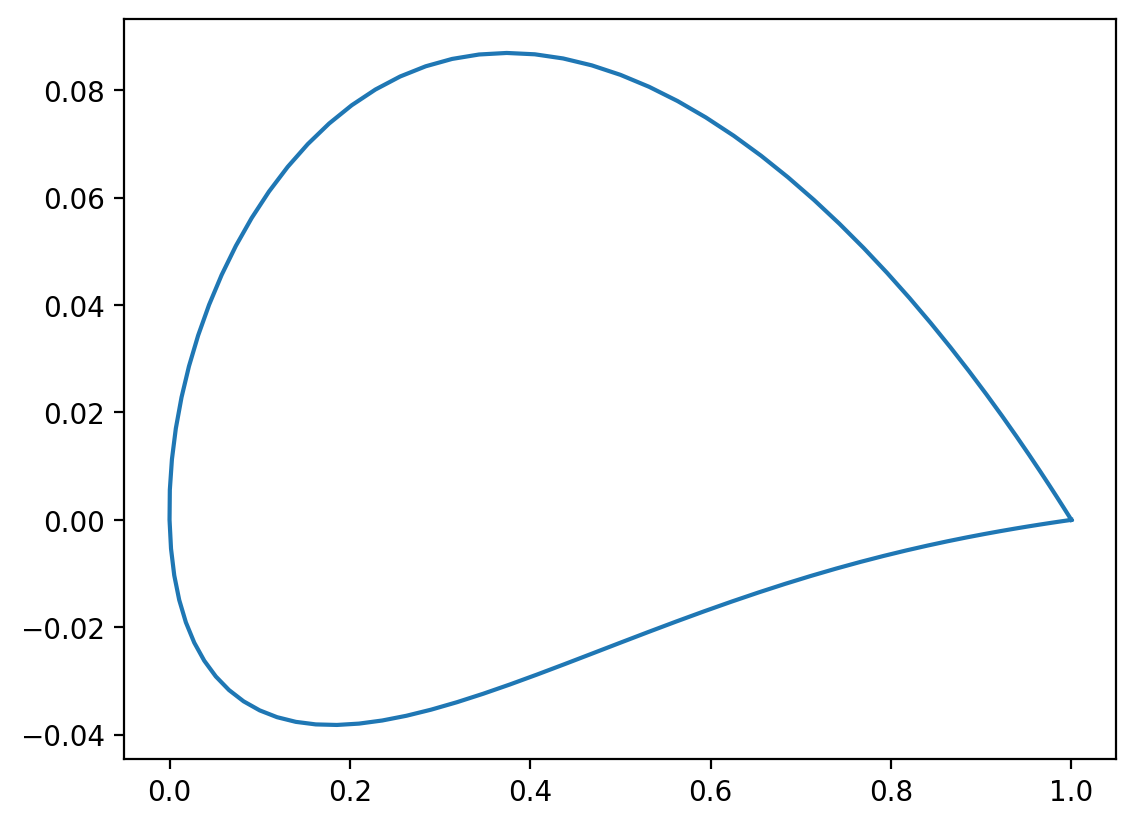

In [12]:
nacaf = naca.naca4("3512", 50, half_cosine_spacing=True)
nacaf = np.array(nacaf)
plt.plot(nacaf[0], nacaf[1])
len(nacaf[0])

In [37]:
out = ""
for point in range(nacaf.shape[1]-1, -1, -1):
    out += f"{nacaf[0][point]:.8f}\t{nacaf[1][point]:.8f}\n"
with open("naca.xy", 'w') as file:
    file.write(out)

In [36]:
out

'1.00000000\t0.00000000\n0.99899632\t-0.00002402\n0.99598978\t-0.00009634\n0.99099379\t-0.00021776\n0.98403064\t-0.00038966\n0.97513124\t-0.00061404\n0.96433494\t-0.00089361\n0.95168925\t-0.00123183\n0.93724946\t-0.00163297\n0.92107828\t-0.00210210\n0.90324548\t-0.00264504\n0.88382739\t-0.00326826\n0.86290652\t-0.00397870\n0.84057105\t-0.00478353\n0.81691442\t-0.00568978\n0.79203481\t-0.00670396\n0.76603469\t-0.00783156\n0.73902031\t-0.00907661\n0.71110125\t-0.01044108\n0.68238986\t-0.01192440\n0.65300081\t-0.01352298\n0.62305053\t-0.01522976\n0.59265675\t-0.01703389\n0.56193794\t-0.01892052\n0.53101285\t-0.02087071\n0.50000000\t-0.02286150\n0.46901726\t-0.02486616\n0.43818139\t-0.02685450\n0.40760767\t-0.02879348\n0.37740959\t-0.03064778\n0.34769847\t-0.03238060\n0.31858332\t-0.03395445\n0.29017052\t-0.03533199\n0.26256371\t-0.03647693\n0.23586363\t-0.03735477\n0.21016795\t-0.03793357\n0.18557113\t-0.03818458\n0.16216433\t-0.03808265\n0.14003513\t-0.03760666\n0.11926742\t-0.03673960\n

In [32]:
for i in range(0,5):
    print(i)

0
1
2
3
4


In [34]:
for i in range(5,0,-1):
    print(i)

5
4
3
2
1
